## Введение в аналитическую геометрию

In [310]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sys

### 1. Даны два вектора в трехмерном пространстве: (10,10,10) и (0,0,-10)

2) Напишите код на Python, реализующий расчет длины вектора, заданного его координатами. (в программе)

In [11]:
class Vector3(object):
    def __init__(self, x,y,z):
        self.x, self.y, self.z = x, y, z
        
    def __add__(self, other):
        if isinstance(other, (int, float)):
            return Vector3(self.x + other, self.y + other, self.z + other)
        elif isinstance(other, Vector3):
            return Vector3(self.x + other.x, self.y + other.y, self.z + other.z)
    
    __radd__ = __add__
    
    def __str__(self):
        return '(%s, %s, %s)' % (self.x, self.y, self.z)
    

In [14]:
a = Vector3(10, 10, 10)
b = Vector3(0, 0, -10)
c = a + b
print(c)

(10, 10, 0)


### 2. Почему прямые не кажутся перпендикулярными? (см.ролик)

In [326]:
def plot(xy_set):
    plt.figure(figsize=(5, 5))
    plt.axis('scaled')    
    offset = 1 
    
    x_min = x_max = xy_set[0][0][0]
    y_min = y_max = xy_set[0][1][0]
    for xy in xy_set:
        cur_min_x = min(xy[0])
        cur_max_x = max(xy[0])
        cur_min_y = min(xy[1])
        cur_max_y = max(xy[1])
        if cur_min_x < x_min:
            x_min = cur_min_x
        elif cur_max_x > x_max:
            x_max = cur_max_x
        if cur_min_y < y_min:
            y_min = cur_min_y
        elif cur_max_y > y_max:
            y_max = cur_max_y
    
    plt.xlim(x_min - offset, 
             x_max + offset)
    plt.ylim(y_min - offset, 
             y_max + offset)
    
    for xy in xy_set:
        plt.plot(xy[0], xy[1])
    
    plt.xlabel('x')
    plt.ylabel('y')

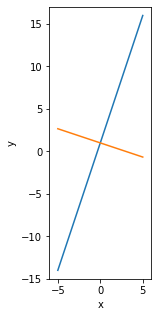

In [340]:
x = np.linspace(-5, 5, 21)
y1 = 3 * x + 1
y2 = (-1 / 3) * x + 1
plot([
    [x, y1], 
    [x, y2]
])

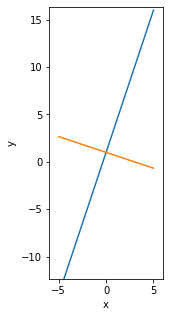

In [250]:
plot_figure(x, y, y2)

### 3.  Напишите код на Python, реализующий построение графиков:
1) окружности,
2) эллипса,
3) гиперболы.


In [312]:
sys.float_info.min
sys.float_info.max

1.7976931348623157e+308

In [331]:
def plot_circle(x0, y0, r):
    x, y1, y2 = [], [], []
    
    for x_ in np.linspace(-r, r, 1000):
        x.append(x_ - x0)
        y_ = math.sqrt(r**2 - x_**2)
        y1.append(y0 + y_)
        y2.append(y0 - y_)
    
    plot([
        [x, y1], 
        [x, y2]
    ])

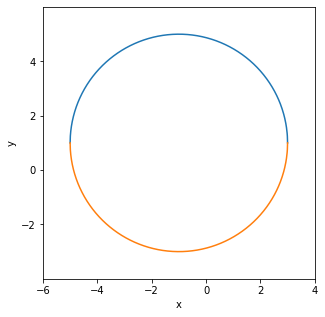

In [332]:
plot_circle(1, 1, 4)

In [336]:
def plot_ellipse(x0, y0, r1, r2):
    x, y1, y2 = [], [], []
    
    for x_ in np.linspace(-r1, r1, 1000):
        x.append(x_ - x0)
        y_ = r2/r1 * math.sqrt(r1**2 - x_**2)
        y1.append(y0 + y_)
        y2.append(y0 - y_)

    plot([
        [x, y1],
        [x, y2]
    ])

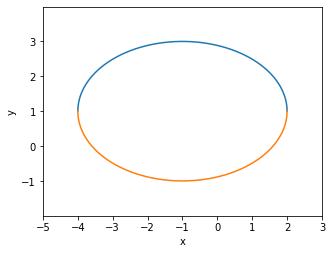

In [337]:
plot_ellipse(1, 1, 3, 2)

In [341]:
def plot_hyperbola(x0, y0, r1, r2):
    x1, x2, y1, y2, y3, y4 = [], [], [], [], [], []
    
    lim = 10
    
    for x_ in np.linspace(-lim, -r1, 1000):
        x1.append(x_ - x0)
        y_ = r2/r1 * math.sqrt(x_**2 - r1**2)
        y1.append(y0 + y_)
        y2.append(y0 - y_)
        
    for x_ in np.linspace(r1, lim, 1000):
        x2.append(x_ - x0)
        y_ = r2/r1 * math.sqrt(x_**2 - r1**2)
        y3.append(y0 + y_)
        y4.append(y0 - y_)
        
    plot([
        [x1, y1], 
        [x1, y2], 
        [x2, y3], 
        [x2, y4]
    ])

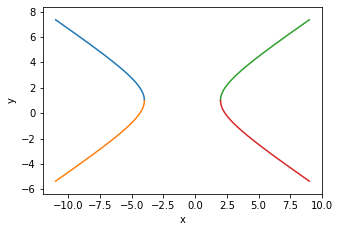

In [342]:
plot_hyperbola(1, 1, 3, 2)

### 5.

In [362]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

### 1) Нарисуйте трехмерный график двух параллельных плоскостей.

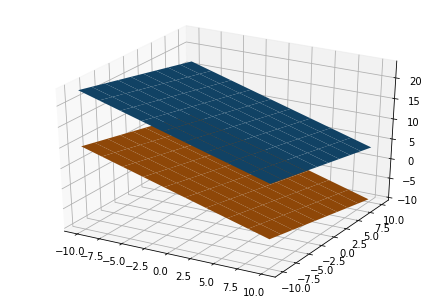

In [363]:
fig = plt.figure()
ax = Axes3D(fig)

a,b,c,d = 0.2, 0.1, 0.3, 4

x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 10)

X, Y = np.meshgrid(x, y)
Z = (d - a * X - b * Y) / c
surf = ax.plot_surface(X, Y, Z)

Z = (- a * X - b * Y) / c
surf = ax.plot_surface(X, Y, Z)

### 2) Нарисуйте трехмерный график двух любых поверхностей второго порядка.

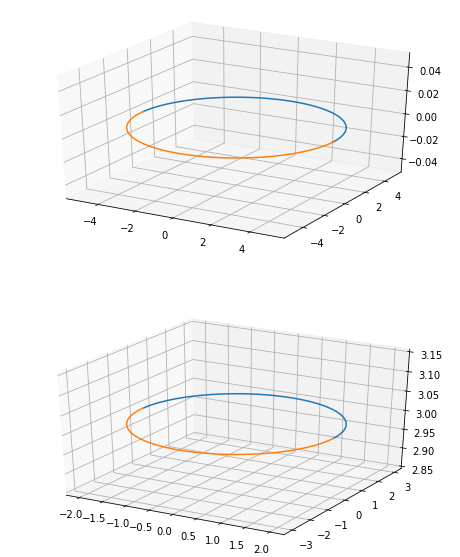

In [409]:
fig = plt.figure(figsize=(8, 10))
ax1 = fig.add_subplot(211, projection='3d')

x1, y1, y2 = [], [], []
r = 5    
    
for x_ in np.linspace(-r, r, 1000):
    x1.append(x_)
    y_ = math.sqrt(r**2 - x_**2)
    y1.append(y_)
    y2.append(-y_)

ax1.plot(x1, y1, 0)
ax1.plot(x1, y2, 0);

ax2 = fig.add_subplot(212, projection='3d')

x2, y3, y4 = [], [], []
r1, r2 = 2, 3

for x_ in np.linspace(-r1, r1, 1000):
        x2.append(x_)
        y_ = r2/r1 * math.sqrt(r1**2 - x_**2)
        y3.append(y_)
        y4.append(-y_)
        
ax2.plot(x2, y3, 3)
ax2.plot(x2, y4, 3);